In [34]:
%pip install seaborn
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [35]:
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [36]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
gpus

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

In [37]:
model_type = "VGG16"
variant = "VARA"
count = "01b"
imagesize = 64
epochs = 15
CLASSES = ['cancer', 'chickenpox', "cowpox", "healthy", "measles", "monkeypox"]

In [38]:
trdata = ImageDataGenerator(rescale=1.0/255.0)

traindata = trdata.flow_from_directory(
    directory="dataset/train",
    target_size=(imagesize,imagesize),
    class_mode='categorical',
    classes = CLASSES,
)

tsdata = ImageDataGenerator(rescale=1.0/255.0)

devdata = tsdata.flow_from_directory(
    directory="dataset/val", 
    target_size=(imagesize,imagesize),
    class_mode='categorical',
    classes = CLASSES,
)

Found 9940 images belonging to 6 classes.
Found 1077 images belonging to 6 classes.


In [39]:
model = Sequential()
model.add(Conv2D(input_shape=(imagesize,imagesize,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=6, activation="softmax"))

In [40]:
from keras.optimizers import Adam, SGD
opt = SGD(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4096)           │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 6)              │        24,582 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,913,286 (152.26 MB)

 Trainable params: 39,913,286 (152.26 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("vgg16_1.keras", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
history = model.fit(traindata, validation_data= devdata, epochs=epochs)

Epoch 1/15
311/311 ━━━━━━━━━━━━━━━━━━━━ 832s 3s/step - accuracy: 0.5466 - loss: 1.7592 - val_accuracy: 0.5534 - val_loss: 1.6718
Epoch 2/15
311/311 ━━━━━━━━━━━━━━━━━━━━ 2511s 8s/step - accuracy: 0.5673 - loss: 1.6383 - val_accuracy: 0.5534 - val_loss: 1.5667
Epoch 3/15
311/311 ━━━━━━━━━━━━━━━━━━━━ 1384s 4s/step - accuracy: 0.5697 - loss: 1.5292 - val_accuracy: 0.5534 - val_loss: 1.4760
Epoch 4/15
 77/311 ━━━━━━━━━━━━━━━━━━━━ 12:54 3s/step - accuracy: 0.5508 - loss: 1.4734

KeyboardInterrupt: 

In [ ]:
print(history.history.keys())

In [ ]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [87]:
# Evaluate the model on the test set (you should have a separate test set)
testingData = ImageDataGenerator(rescale=1.0/255.0)

testdata = testingData.flow_from_directory(
    directory="data/test",
    target_size=(imagesize,imagesize),
    class_mode='categorical',
    classes = [
        'Hyalomma', 'Rhipicephalus', "Unidentified"
    ],
)

Found 4861 images belonging to 3 classes.


In [88]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Make predictions on the test set
test_loss, test_accuracy = model.evaluate(testdata)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

y_true = testdata.classes
y_pred_probs = model.predict(testdata, steps = None)

print("testdata.samples:", testdata.samples)
print("len(y_true):", len(y_true))

y_pred = np.argmax(y_pred_probs, axis=1)
print("y_pred: ", len(y_pred));

# # Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision
precision = precision_score(y_true, y_pred, average='weighted')

# Calculate sensitivity (recall)
sensitivity = recall_score(y_true, y_pred, average='weighted')

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)

152/152 ━━━━━━━━━━━━━━━━━━━━ 42s 275ms/step - accuracy: 0.9825 - loss: 0.0440
Test Loss: 0.05191081017255783
Test Accuracy: 0.9825139045715332
152/152 ━━━━━━━━━━━━━━━━━━━━ 42s 278ms/step
testdata.samples: 4861
len(y_true): 4861
y_pred:  4861
Confusion Matrix:
[[ 199  470  287]
 [ 484 1150  748]
 [ 307  745  471]]
Accuracy: 0.3744085579098951
Precision: 0.37579690895112083
Sensitivity (Recall): 0.3744085579098951


In [91]:
testdata

In [90]:
accuracy

38

In [1]:
for i in range(len(y_pred)):
    print(i, ": ", y_true[i], y_pred[i])

NameError: name 'y_pred' is not defined

In [89]:
from datetime import date
import math

accuracy = math.ceil(accuracy * 100)

today = date.today()

# dd/mm/YY
date = "-".join(today.strftime("%d/%m/%Y").split("/"))
print(date)

name = f"{model_type}-{variant}{count}-{imagesize}x{imagesize}-EP{epochs}-ACCU{accuracy}-{date}.keras"

model.save(name);

02-06-2024


Found 4861 images belonging to 3 classes.


/Users/ame/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


152/152 ━━━━━━━━━━━━━━━━━━━━ 43s 279ms/step - accuracy: 0.9967 - loss: 0.0073
Accuracy: 0.9983542561531067
152/152 ━━━━━━━━━━━━━━━━━━━━ 44s 287ms/step
Confusion Matrix
[[ 952    4    0]
 [   2 2378    2]
 [   0    0 1523]]
Precision: 0.9983539251344788
Sensitivity (Recall): 0.9983542480970994
Error Rate: 0.0016457438468933105
Classification Report
               precision    recall  f1-score   support

     Hyalomma       1.00      1.00      1.00       956
Rhipicephalus       1.00      1.00      1.00      2382
 Unidentified       1.00      1.00      1.00      1523

     accuracy                           1.00      4861
    macro avg       1.00      1.00      1.00      4861
 weighted avg       1.00      1.00      1.00      4861



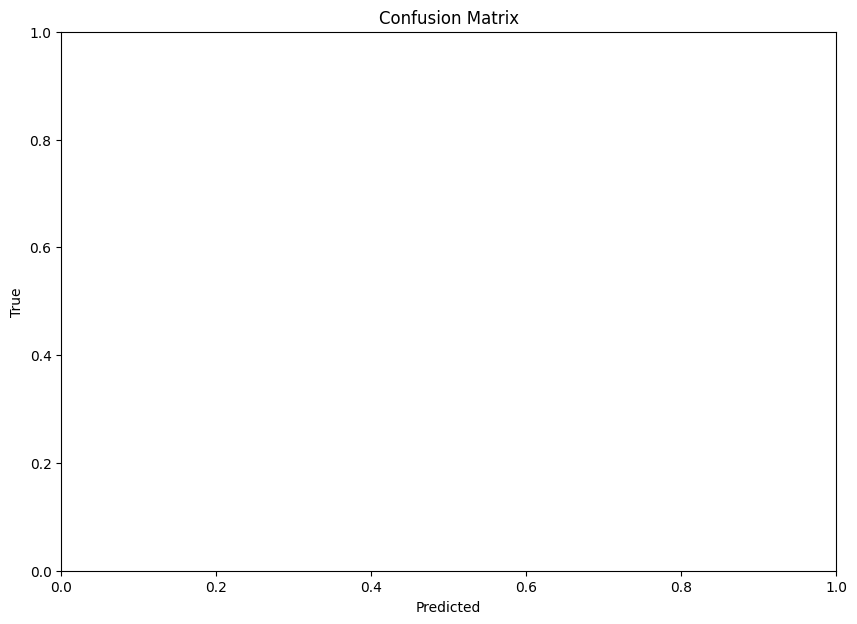

In [93]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your pre-trained model
model = tf.keras.models.load_model('VGG16-VARA01a-32x32-EP40-ACCU39-02-06-2024.keras')

# Create the test data generator
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Specify the path to your test set
test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(imagesize, imagesize),  # Change this to the input size of your model
    class_mode='categorical',  # or 'binary' depending on your model
    shuffle=False,
    classes = [
        'Hyalomma', 'Rhipicephalus', "Unidentified"
    ],
)

# Evaluate the model using the generator
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Accuracy: {accuracy}")

# Get predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix")
print(cm)

# Calculate additional metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
error_rate = 1 - accuracy

print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {recall}")
print(f"Error Rate: {error_rate}")

# Classification Report
print("Classification Report")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
